In [2]:
import tensorflow.keras as keras
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

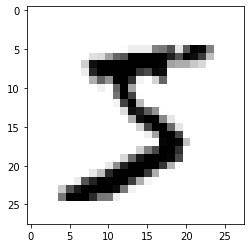

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

In [8]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2583 - accuracy: 0.9264
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1028 - accuracy: 0.9681
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0710 - accuracy: 0.9772


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0936 - accuracy: 0.9704
0.09364087134599686
0.9703999757766724


In [12]:
predictions = model.predict(x_test)
print(predictions)

[[2.09418127e-09 9.09067737e-08 4.49635991e-06 ... 9.99958992e-01
  3.11920978e-08 8.54194923e-07]
 [7.51903517e-09 1.55085445e-06 9.99997735e-01 ... 1.67990721e-09
  3.03761453e-07 3.74824234e-11]
 [2.42180067e-06 9.98015046e-01 4.83282784e-05 ... 6.90764689e-04
  9.60139092e-04 1.49974085e-05]
 ...
 [1.74795254e-08 8.31322041e-07 1.57807250e-07 ... 5.62797140e-06
  2.19245630e-05 8.91918462e-05]
 [4.76189115e-07 1.61105831e-07 1.05065965e-07 ... 1.44636987e-08
  1.31018038e-04 8.15690893e-09]
 [1.19912465e-06 2.59128488e-08 1.34165717e-07 ... 3.03851284e-11
  2.09294644e-08 3.15732969e-08]]


In [13]:
import numpy as np
print(np.argmax(predictions[0]))

7


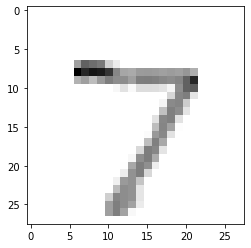

In [15]:
plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()